In [6]:
from gensim.models import word2vec
import glob, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlp
import seaborn as sns

from matplotlib import font_manager
font = font_manager.FontProperties(fname="C:\\Windows\\Fonts\\H2MJSM.TTF").get_name()
mlp.rc('font', family=font)
sns.set(style="whitegrid", font=font)

In [48]:
model = word2vec.Word2Vec.load("./word2vec/word2vec.model")
word = input("단어를 입력해보세요! : ")
try:
    print(model.most_similar(positive=[word]))
    data = model.most_similar(positive=[word])
except:
    print("해당 되는 단어가 없습니다.")

단어를 입력해보세요! : 매도
[('프로그램', 0.7664526104927063), ('존재', 0.7398402690887451), ('도', 0.7373987436294556), ('아무', 0.7247645258903503), ('고통', 0.7187991142272949), ('폭탄', 0.7115105390548706), ('모습', 0.697767972946167), ('순식간', 0.6961957216262817), ('보다', 0.688916802406311), ('날', 0.6861306428909302)]


C:\Users\leesoojin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  after removing the cwd from sys.path.
C:\Users\leesoojin\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
C:\Users\leesoojin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """


In [49]:
print(data)
print(type(data))
print(data[1][0])

w = [i[0] for i in data]
c = [i[1] for i in data]

dic = {
    'word':w,
    'count':c
}

df = pd.DataFrame(dic)
print(df)

[('프로그램', 0.7664526104927063), ('존재', 0.7398402690887451), ('도', 0.7373987436294556), ('아무', 0.7247645258903503), ('고통', 0.7187991142272949), ('폭탄', 0.7115105390548706), ('모습', 0.697767972946167), ('순식간', 0.6961957216262817), ('보다', 0.688916802406311), ('날', 0.6861306428909302)]
<class 'list'>
존재
   word     count
0  프로그램  0.766453
1    존재  0.739840
2     도  0.737399
3    아무  0.724765
4    고통  0.718799
5    폭탄  0.711511
6    모습  0.697768
7   순식간  0.696196
8    보다  0.688917
9     날  0.686131


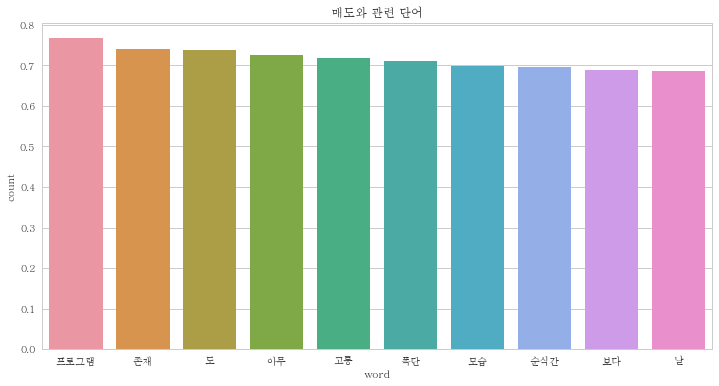

In [50]:
plt.figure(figsize=(12,6))
plt.title(word+"와 관련 단어")
sns.barplot(x="word", y='count', data=df)

In [67]:
data = pd.read_csv('coinpan_medi.csv')

print(data.head(2))

                                title        date  \
0    다음주 면 캡이 캐셔 10원 미만 엽전주 다 제낄듯 하다.  2018.08.31   
1  아오 어제 시드 코제로 다 옮겼더만 스타도 못사고 롬도 못사고  2018.08.31   

                                             content  
0   이번주안에 덴트 엠블 제끼고 다음주 메디 빙고 때려 잡으러 간다. 내 예상이 틀릴...  
1   스타는 못사서 다행인데 롬 ㅅㅂ 출금제한까지 묶여서 잦같네 그동안 메디 스알 떡상...  


In [68]:
date = data.iloc[:,1].values
print(date[:5])

['2018.08.31' '2018.08.31' '2018.08.31' '2018.08.31' '2018.08.31']


In [69]:
date_array = []
for idx, i in enumerate(date):
    d = i.split(".")[1]
    date_array.append(d)

In [70]:
print(date_array[:10])
print(len(date_array))

['08', '08', '08', '08', '08', '08', '08', '08', '08', '08']
6160


In [71]:
from collections import Counter
count_by_date = Counter(date_array)

In [72]:
print(count_by_date)
print(type(count_by_date))

Counter({'08': 4000, '01': 1151, '05': 279, '07': 181, '06': 167, '02': 160, '04': 123, '03': 99})
<class 'collections.Counter'>


In [76]:
a = list(Counter(count_by_date).items())

date, cnt = [], []

for i in a:
    date.append(i[0])
    cnt.append(i[1])
    
print(date)
print(cnt)

d = {
    'date' : date,
    'count' : cnt
}

data = pd.DataFrame(d)
print(data)

#count_by_date = dict(count_by_date)
#print(count_by_date)

#c_date = pd.DataFrame(count_by_date)
#print(c_date)

['08', '07', '06', '05', '04', '03', '02', '01']
[4000, 181, 167, 279, 123, 99, 160, 1151]
  date  count
0   08   4000
1   07    181
2   06    167
3   05    279
4   04    123
5   03     99
6   02    160
7   01   1151


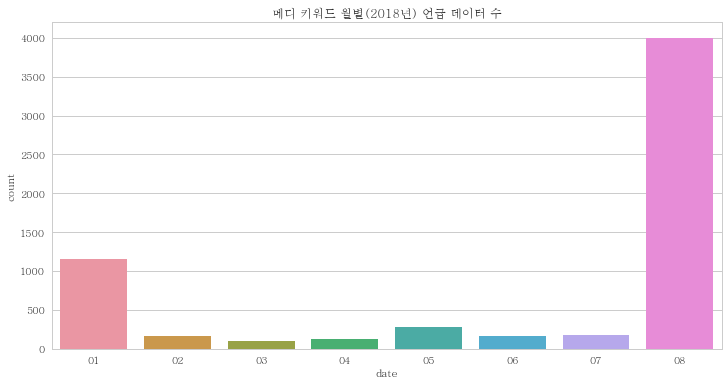

In [77]:
plt.figure(figsize=(12,6))
plt.title("메디 키워드 월별(2018년) 언급 데이터 수")
sns.barplot(x="date", y='count', data=data)